In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\sonia\Downloads\AirPassengers.csv")

In [5]:
data.head()

,Month,Passengers
0,15-01-1949,112
1,15-02-1949,118
2,15-03-1949,132
3,15-04-1949,129
4,15-05-1949,121


In [7]:
data.tail()

,Month,Passengers
139,15-08-1960,606
140,15-09-1960,508
141,15-10-1960,461
142,15-11-1960,390
143,15-12-1960,432


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


data= data.set_index('Month')

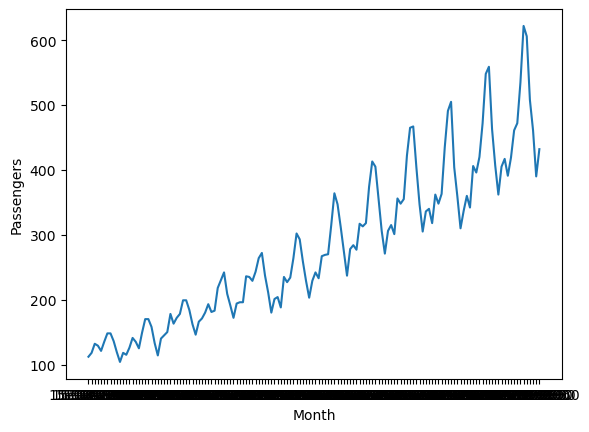

In [15]:
sns.lineplot(x=data.index, y=data['Passengers'])
plt.show()

# Check for stationarity


Method-1 Rolling Statistics

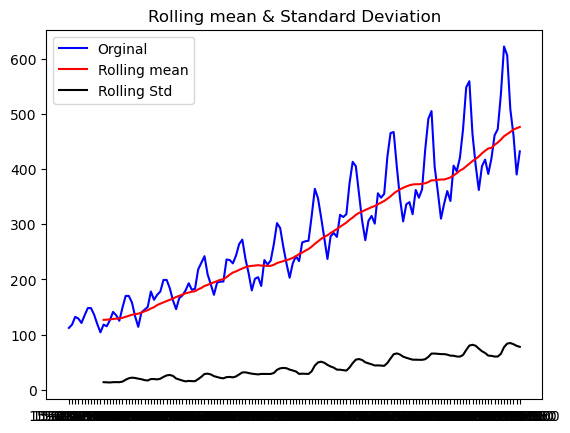

In [25]:
# Determing the rolling statistics
rolmean = data['Passengers'].rolling(window=12).mean()
rolstd =  data['Passengers'].rolling(window=12).std()

#Plot rolling statistics:
orig= plt.plot(data['Passengers'],color='blue',label='Orginal')
mean= plt.plot(rolmean,color='red',label='Rolling mean')
std= plt.plot(rolstd,color='Black',label='Rolling Std')
plt.title("Rolling mean & Standard Deviation")
plt.legend()
plt.show()


Method-2 Augmented Dicky fuller test

In [30]:
from statsmodels.tsa.stattools import adfuller
adfuller_result= adfuller(data['Passengers'])
adfuller_result

(0.8153688792060511,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [32]:
print('p-value:', adfuller_result[1])

p-value: 0.991880243437641


the time series is not stsationary

Now we have to convert the non stationary data to stationary data

Differencing

In [41]:
diff= data['Passengers']- data['Passengers'].shift(2)
diff.dropna(inplace=True)

#Applying ADF Test
adfuller_result = adfuller(diff)
print('p-value:', adfuller_result[1])

p-value: 0.03862975767698981


the time series is stationary

Step-4 Plot ACF/PACF and find p,d,q parameters

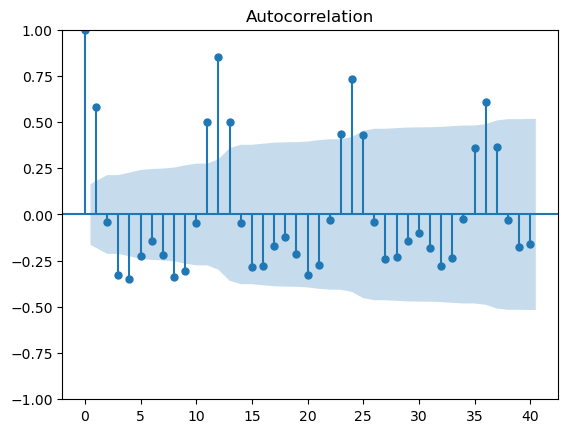

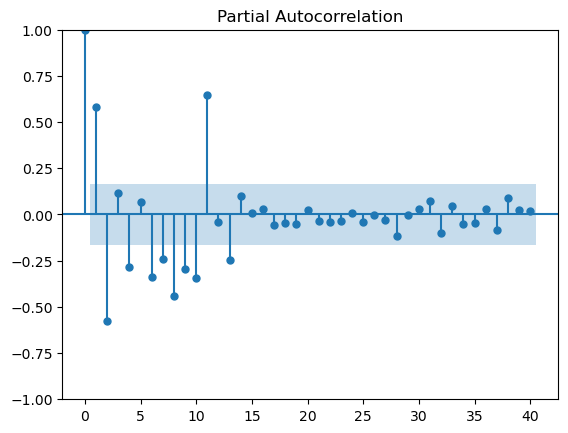

In [45]:
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.api as sm
fig = sm.graphics.tsa.plot_acf(diff,lags=40)
fig = sm.graphics.tsa.plot_pacf(diff,lags=40)


# Train-Test Split

In [48]:
y_train = diff[:144]
y_test = diff[114:]


# Build ARIMA MODEL

In [75]:
from statsmodels.tsa.arima.model import ARIMA
model= ARIMA(diff, order=(11,2,12))
ARIMA= model.fit()

C:\Users\sonia\anaconda4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sonia\anaconda4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sonia\anaconda4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sonia\anaconda4\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [71]:
ypred_test= ARIMA.predict(start=y_test.index[0],end =y_test.index[-1])
ypred_train= ARIMA.predict(start=y_train.index[0],end =y_train.index[-1])

In [73]:
from sklearn.metrics import r2_score
print("Train_R2", r2_score(ypred_train,y_train))
print("Test_R2", r2_score(ypred_test,y_test))

Train_R2 0.9473511612247597
Test_R2 0.9650419905577505


In [91]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(diff, seasonal_order=(11,1,12,12))
SARIMA= model.fit()

C:\Users\sonia\anaconda4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sonia\anaconda4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [92]:
ypred_test= SARIMA.predict(start=y_test.index[0],end =y_test.index[-1])
ypred_train= SARIMA.predict(start=y_train.index[0],end =y_train.index[-1])

In [94]:
from sklearn.metrics import r2_score
print("Train_R2", r2_score(ypred_train,y_train))
print("Test_R2", r2_score(ypred_test,y_test))

Train_R2 0.9323637223590635
Test_R2 0.9562824203309481
